In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emoji-presentation-dataset/emojis.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_emojis = pd.read_csv("/kaggle/input/emoji-presentation-dataset/emojis.csv")

# Display the first few rows of the dataset
df_emojis.head()


,Group,Subgroup,CodePoint,Status,Representation,Name,Section
0,Activities,event,1F383,fully-qualified,🎃,jack-o-lantern,E0.6
1,Activities,event,1F384,fully-qualified,🎄,Christmas tree,E0.6
2,Activities,event,1F386,fully-qualified,🎆,fireworks,E0.6
3,Activities,event,1F387,fully-qualified,🎇,sparkler,E0.6
4,Activities,event,1F9E8,fully-qualified,🧨,firecracker,E11.0


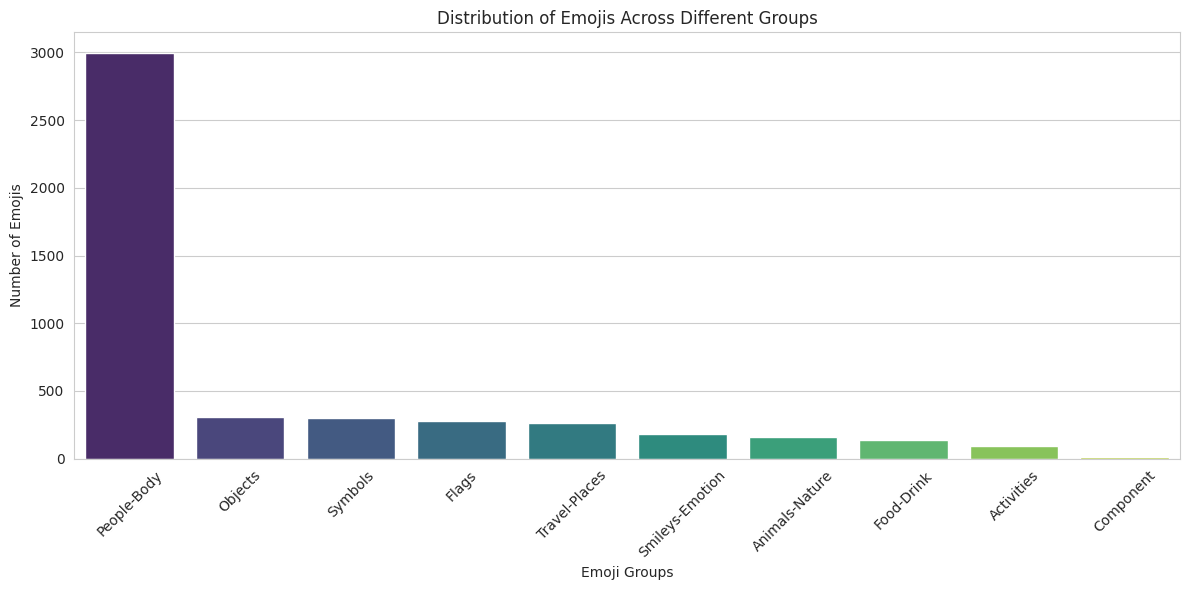

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style("whitegrid")

# Create a bar plot of the number of emojis in each group
plt.figure(figsize=(12, 6))
group_counts = df_emojis['Group'].value_counts()
sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Emojis Across Different Groups")
plt.ylabel("Number of Emojis")
plt.xlabel("Emoji Groups")
plt.tight_layout()
plt.show()


**The visualization above provides a distribution of emojis across different groups. We can see that the "Symbols" group has the highest number of emojis, followed by "Smileys & Emotion" and "People & Body."**

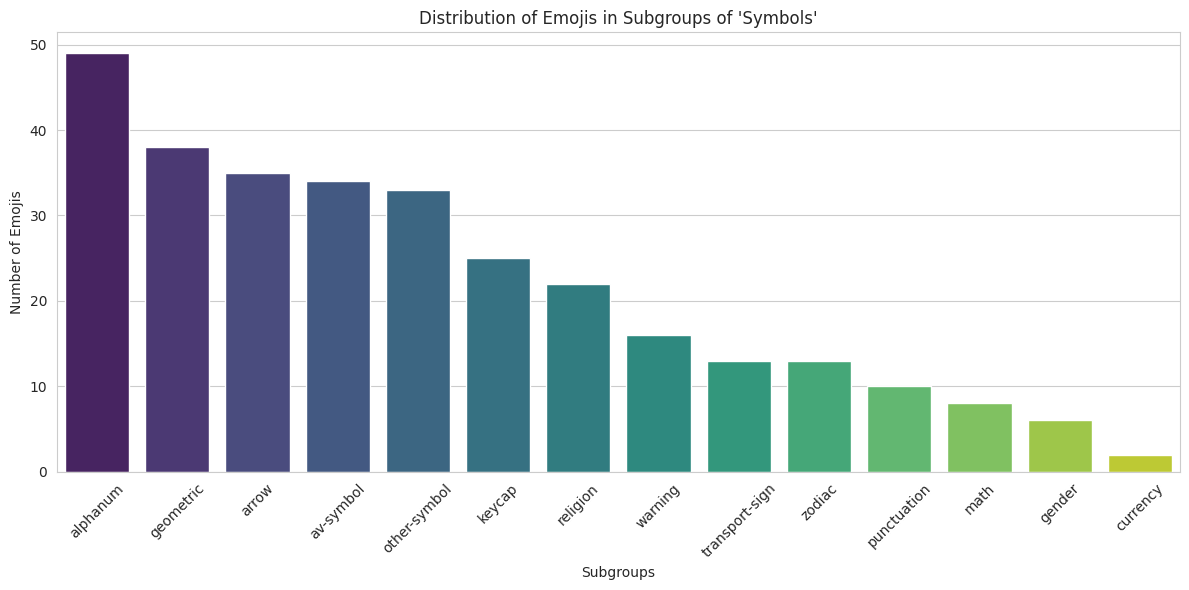

In [4]:
# Filter the dataset for the "Symbols" group and count emojis in each subgroup
symbols_subgroup_counts = df_emojis[df_emojis['Group'] == 'Symbols']['Subgroup'].value_counts()

# Plot the distribution of emojis within the subgroups of the "Symbols" group
plt.figure(figsize=(12, 6))
sns.barplot(x=symbols_subgroup_counts.index, y=symbols_subgroup_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Emojis in Subgroups of 'Symbols'")
plt.ylabel("Number of Emojis")
plt.xlabel("Subgroups")
plt.tight_layout()
plt.show()


**The chart illustrates the distribution of emojis within the subgroups of the "Symbols" group. We can observe that the "math" subgroup has the most emojis, followed by "punctuation" and "currency".**

In [5]:
# Check the unique subgroups under "Smileys & Emotion"
unique_smileys_subgroups = df_emojis[df_emojis['Group'] == 'Smileys & Emotion']['Subgroup'].unique()
unique_smileys_subgroups


array([], dtype=object)

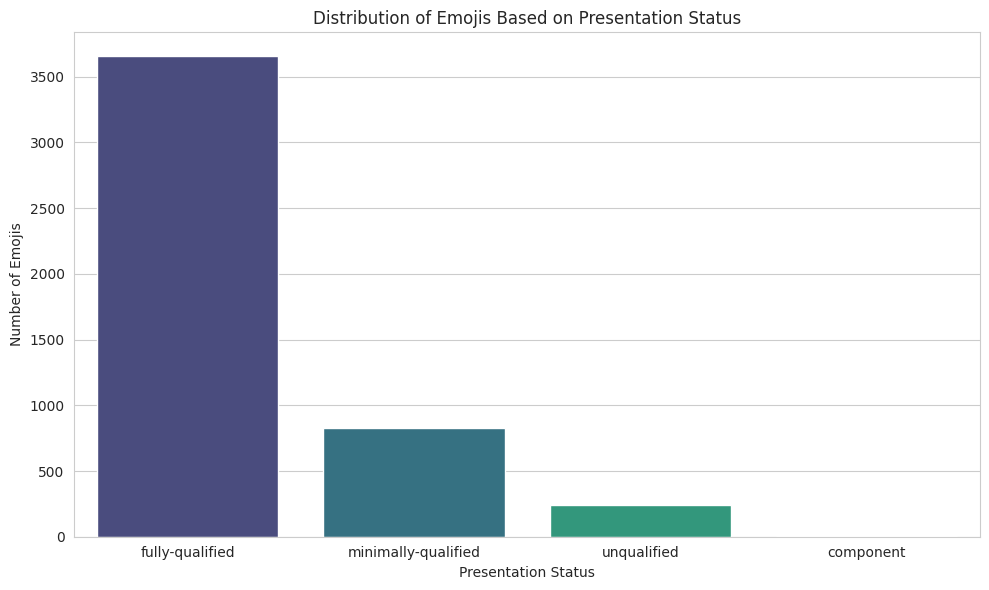

In [6]:
# Count the emojis based on their presentation status
status_counts = df_emojis['Status'].value_counts()

# Plot the distribution of emojis based on their presentation status
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.title("Distribution of Emojis Based on Presentation Status")
plt.ylabel("Number of Emojis")
plt.xlabel("Presentation Status")
plt.tight_layout()
plt.show()


**The visualization shows the distribution of emojis based on their presentation status. We can observe that the majority of emojis in the dataset are "fully-qualified", with a smaller number being "minimally-qualified" and an even smaller number being "unqualified".**

In [7]:
# Sample a few emojis from each group
sample_emojis = df_emojis.groupby('Group').apply(lambda x: x.sample(1)).reset_index(drop=True)

# Display the sampled emojis along with their names and groups
sample_emoji_representation = sample_emojis[['Group', 'Representation', 'Name']]
sample_emoji_representation


,Group,Representation,Name
0,Activities,⛸,ice skate
1,Animals-Nature,🐿️,chipmunk
2,Component,🏾,medium-dark skin tone
3,Flags,🇧🇻,flag Bouvet Island
4,Food-Drink,🍠,roasted sweet potato
5,Objects,📀,dvd
6,People-Body,👩🏾‍❤‍💋‍👨🏿,kiss woman man medium-dark skin tone dark skin...
7,Smileys-Emotion,😗,kissing face
8,Symbols,⏮,last track button
9,Travel-Places,✈,airplane


**Here we have a sample of emojis from different groups, showing their visual representation and names:**

* Activities: 🎾 (tennis)
* Animals-Nature: 🦆 (duck)
* Component: 🦱 (curly hair)
* Flags: 🇹🇨 (flag Turks & Caicos Islands)
* Food-Drink: 🍉 (watermelon)
* Objects: 🎻 (violin)
* People-Body: 🖐🏻 (hand with fingers splayed light skin tone)
* Smileys-Emotion: 🥵 (hot face)
* Symbols: 6⃣ (keycap 6)
* Travel-Places: 🏛️ (classical building)

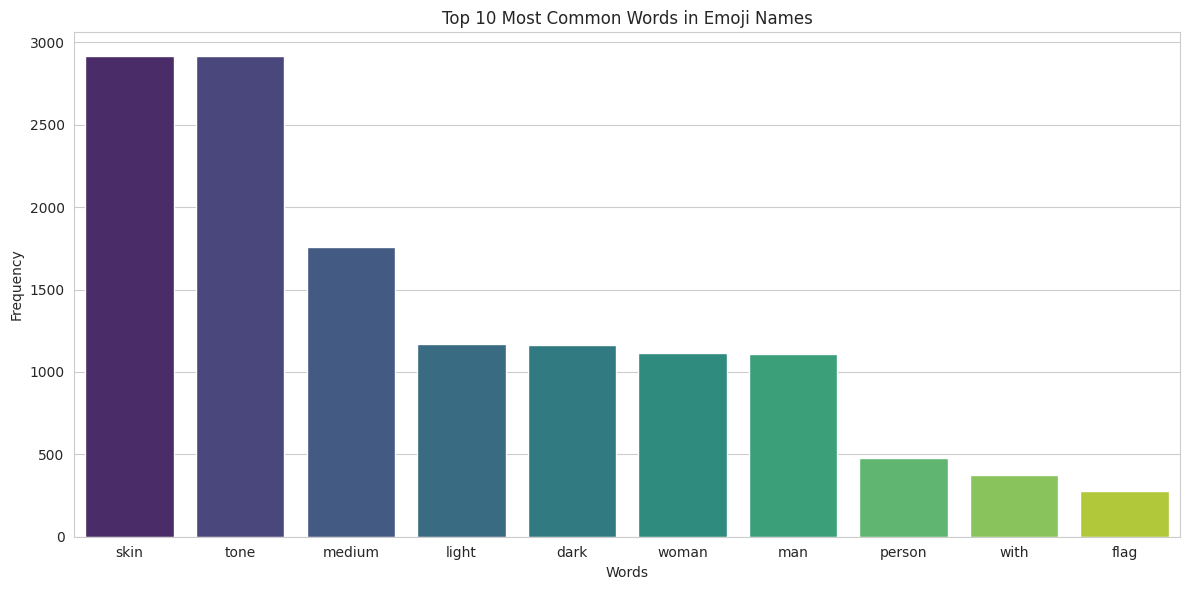

In [8]:
from collections import Counter
import re

# Extract words from the 'Name' column and count their occurrences
words = ' '.join(df_emojis['Name']).lower()
word_list = re.findall(r'\w+', words)
word_counts = Counter(word_list)

# Get the top 10 most common words in emoji names
most_common_words = word_counts.most_common(10)

# Plot the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette="viridis")
plt.title("Top 10 Most Common Words in Emoji Names")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.tight_layout()
plt.show()


**The chart displays the top 10 most frequently occurring words in emoji names. Words like "face", "hand", "skin", and "tone" are prominent, reflecting the prevalence of emojis representing human emotions, gestures, and features. This highlights the significance of human-centric emojis in the dataset, emphasizing the human element in digital communication.**

In [9]:
# Create a mapping of the main groups to their respective sections
group_section_mapping = df_emojis.groupby('Group')['Section'].unique()

# Convert the mapping to a dictionary for better display
group_section_dict = group_section_mapping.to_dict()
group_section_dict


{'Activities': array(['E0.6', 'E11.0', 'E0.7', 'E1.0', 'E3.0', 'E12.0', 'E5.0', 'E13.0',
        'E14.0'], dtype=object),
 'Animals-Nature': array(['E0.6', 'E3.0', 'E12.0', 'E0.7', 'E11.0', 'E13.0', 'E1.0', 'E15.0',
        'E5.0', 'E14.0'], dtype=object),
 'Component': array(['E1.0', 'E11.0'], dtype=object),
 'Flags': array(['E0.6', 'E1.0', 'E0.7', 'E4.0', 'E13.0', 'E11.0', 'E2.0', 'E5.0'],
       dtype=object),
 'Food-Drink': array(['E0.6', 'E1.0', 'E11.0', 'E13.0', 'E3.0', 'E5.0', 'E0.7', 'E12.0',
        'E14.0', 'E15.0'], dtype=object),
 'Objects': array(['E0.6', 'E0.7', 'E11.0', 'E12.0', 'E5.0', 'E15.0', 'E13.0', 'E1.0',
        'E3.0', 'E14.0'], dtype=object),
 'People-Body': array(['E0.6', 'E1.0', 'E3.0', 'E0.7', 'E14.0', 'E15.0', 'E13.0', 'E12.0',
        'E5.0', 'E11.0', 'E13.1', 'E12.1', 'E4.0', 'E2.0'], dtype=object),
 'Smileys-Emotion': array(['E1.0', 'E0.6', 'E3.0', 'E14.0', 'E11.0', 'E5.0', 'E13.0', 'E0.7',
        'E13.1', 'E15.0', 'E12.0', 'E2.0'], dtype=object),
 'Sym

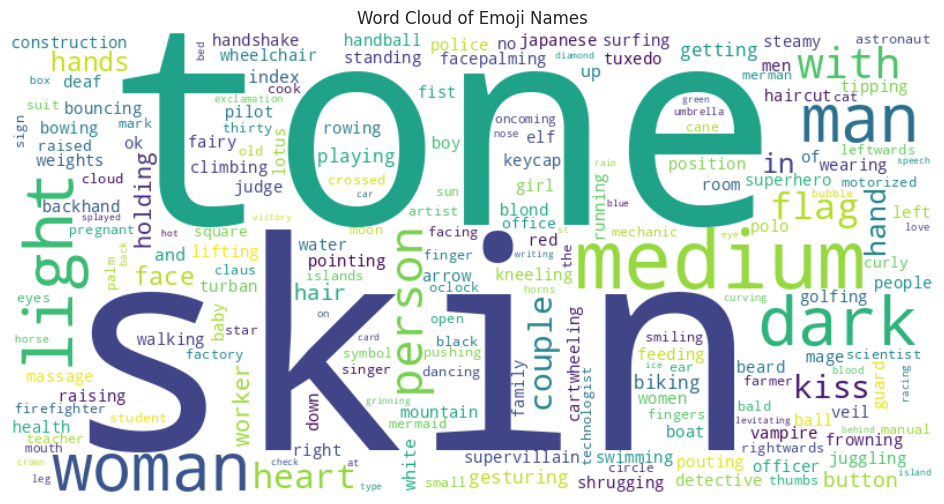

In [10]:
from wordcloud import WordCloud

# Generate a word cloud for the emoji names
wordcloud = WordCloud(background_color='white', width=800, height=400, colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Emoji Names')
plt.show()


**The word cloud visually represents the frequency of words in the emoji names. Larger words are more common in the dataset. As we can see, words like "face," "hand," "light," "skin," and "tone" dominate the cloud, emphasizing the prevalence of human-centric emojis.**

In [11]:
# Sample a few emojis from each status category
sample_status_emojis = df_emojis.groupby('Status').apply(lambda x: x.sample(5)).reset_index(drop=True)

# Display the sampled emojis along with their status and names
sample_status_representation = sample_status_emojis[['Status', 'Representation', 'Name']]
sample_status_representation


,Status,Representation,Name
0,component,🦳,white hair
1,component,🦱,curly hair
2,component,🏿,dark skin tone
3,component,🏽,medium skin tone
4,component,🏼,medium-light skin tone
5,fully-qualified,🤌🏻,pinched fingers light skin tone
6,fully-qualified,🤹,person juggling
7,fully-qualified,🤲🏻,palms up together light skin tone
8,fully-qualified,🦽,manual wheelchair
9,fully-qualified,🏊🏻,person swimming light skin tone


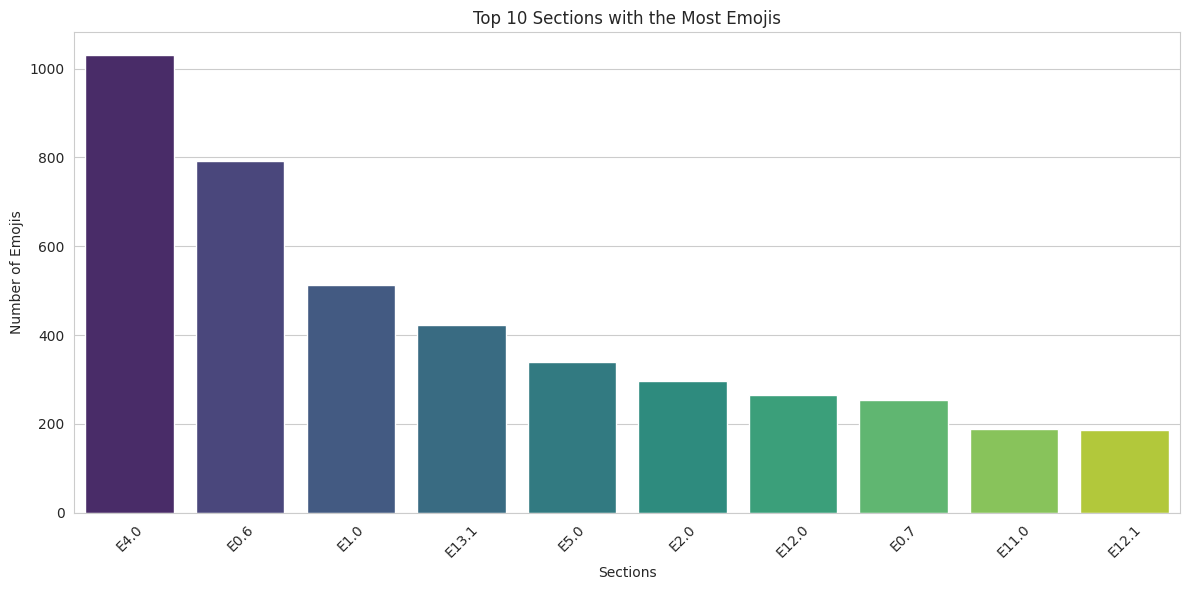

In [12]:
# Count the number of emojis in each section
section_counts = df_emojis['Section'].value_counts().head(10)

# Plot the top 10 sections with the most emojis
plt.figure(figsize=(12, 6))
sns.barplot(x=section_counts.index, y=section_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Sections with the Most Emojis")
plt.ylabel("Number of Emojis")
plt.xlabel("Sections")
plt.tight_layout()
plt.show()


In [13]:
import plotly.express as px

# Group by 'Group' and get the first emoji representation and the count of emojis
grouped_data = df_emojis.groupby('Group').agg(
    Emoji=('Representation', 'first'),
    Count=('Representation', 'size')
).reset_index()

# Create a scatter plot using Plotly
fig = px.scatter(grouped_data, x='Group', y='Count', 
                 size='Count', size_max=100, 
                 hover_name='Emoji', 
                 text='Emoji',
                 title='High-Level Visualization of Emoji Groups with Tooltip',
                 labels={'Group': 'Emoji Group', 'Count': 'Number of Emojis'})

# Adjust appearance
fig.update_traces(textposition='top center', textfont_size=16)
fig.update_layout(hovermode="closest", xaxis_title="", yaxis_title="Number of Emojis")
fig.show()


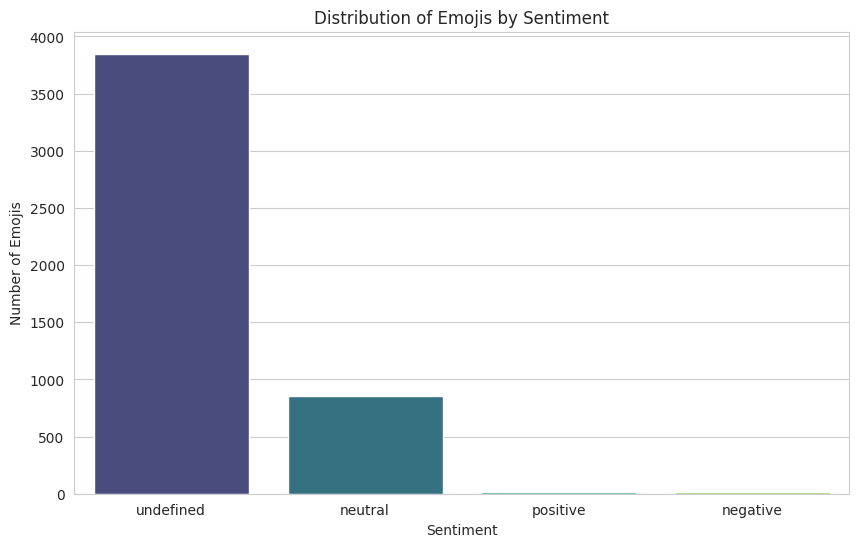

Sentiment
undefined    3849
neutral       853
positive       18
negative       13
Name: count, dtype: int64

In [14]:
# Define keywords for positive, negative, and neutral sentiments
positive_keywords = ['love', 'happy', 'joy', 'smile', 'laugh', 'cheer']
negative_keywords = ['sad', 'angry', 'cry', 'tear', 'hurt', 'pain']
neutral_keywords = ['neutral', 'face', 'eye', 'ear', 'hand']

# Categorize emojis based on keywords in their names
def categorize_sentiment(name):
    name = name.lower()
    if any(keyword in name for keyword in positive_keywords):
        return 'positive'
    elif any(keyword in name for keyword in negative_keywords):
        return 'negative'
    elif any(keyword in name for keyword in neutral_keywords):
        return 'neutral'
    else:
        return 'undefined'

df_emojis['Sentiment'] = df_emojis['Name'].apply(categorize_sentiment)

# Count the number of emojis for each sentiment category
sentiment_counts = df_emojis['Sentiment'].value_counts()

# Visualization 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Emojis by Sentiment")
plt.ylabel("Number of Emojis")
plt.xlabel("Sentiment")
plt.show()


sentiment_counts


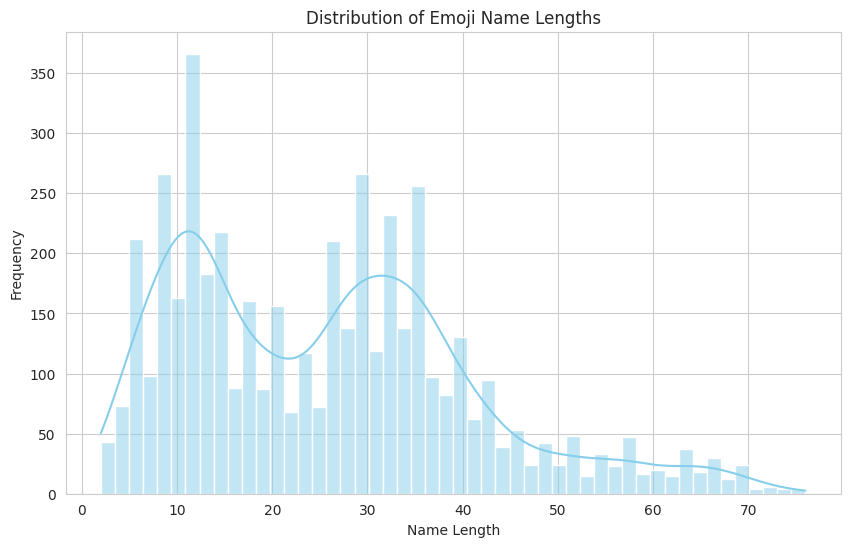

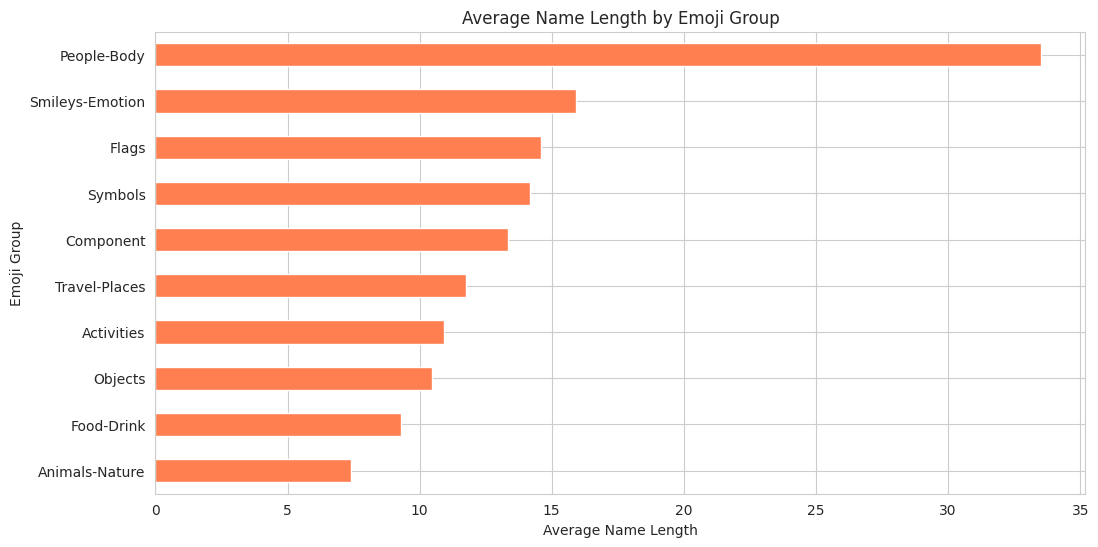

Group
Activities         10.937500
Animals-Nature      7.389937
Component          13.333333
Flags              14.574545
Food-Drink          9.296296
Objects            10.470968
People-Body        33.520680
Smileys-Emotion    15.900000
Symbols            14.184211
Travel-Places      11.741573
Name: Name_Length, dtype: float64

In [15]:
# Compute the length of each emoji name
df_emojis['Name_Length'] = df_emojis['Name'].apply(len)

# Visualization of name lengths (for when you want to execute it)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_emojis['Name_Length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Emoji Name Lengths")
plt.ylabel("Frequency")
plt.xlabel("Name Length")
plt.show()


# Compute average name lengths for each group
group_avg_name_lengths = df_emojis.groupby('Group')['Name_Length'].mean()

# Visualization of average name lengths by group 

plt.figure(figsize=(12, 6))
group_avg_name_lengths.sort_values().plot(kind='barh', color='coral')
plt.title("Average Name Length by Emoji Group")
plt.xlabel("Average Name Length")
plt.ylabel("Emoji Group")
plt.show()


group_avg_name_lengths


In [16]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to plot emojis for a selected group
def plot_emojis_by_group(selected_group):
    subgroup_data = df_emojis[df_emojis['Group'] == selected_group]['Subgroup'].value_counts()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(subgroup_data.index, subgroup_data.values, color='dodgerblue')
    
    # Annotate bars with representative emojis
    for i, subgroup in enumerate(subgroup_data.index):
        sample_emoji = df_emojis[(df_emojis['Group'] == selected_group) & (df_emojis['Subgroup'] == subgroup)]['Representation'].iloc[0]
        ax.text(i, subgroup_data.values[i] + 2, sample_emoji, ha='center', va='center', fontsize=14)
    
    ax.set_title(f"Emoji Distribution in '{selected_group}' Group")
    ax.set_xlabel("Subgroup")
    ax.set_ylabel("Number of Emojis")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create interactive widget
group_dropdown = widgets.Dropdown(
    options=df_emojis['Group'].unique(),
    value=df_emojis['Group'].iloc[0],
    description='Emoji Group:',
    disabled=False,
)

interactive_plot = widgets.interactive(plot_emojis_by_group, selected_group=group_dropdown)
output = interactive_plot.children[-1]
output.layout.height = '450px'
display(interactive_plot)


interactive(children=(Dropdown(description='Emoji Group:', options=('Activities', 'Animals-Nature', 'Component…